In [98]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [99]:
file_path = '../datasets/cleanedfix[undrop].csv'
df = pd.read_csv(file_path)

In [100]:
df.columns

Index(['Time', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle',
       'Owner_of_vehicle', 'Service_year_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Sex_of_casualty', 'Age_band_of_casualty',
       'Casualty_severity', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'Day'],
      dtype='object')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12296 entries, 0 to 12295
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12296 non-null  object
 1   Age_band_of_driver           12296 non-null  object
 2   Sex_of_driver                12296 non-null  object
 3   Educational_level            12296 non-null  object
 4   Vehicle_driver_relation      12296 non-null  object
 5   Driving_experience           12296 non-null  object
 6   Type_of_vehicle              12296 non-null  object
 7   Owner_of_vehicle             12296 non-null  object
 8   Service_year_of_vehicle      12296 non-null  object
 9   Area_accident_occured        12296 non-null  object
 10  Lanes_or_Medians             12296 non-null  object
 11  Road_allignment              12296 non-null  object
 12  Types_of_Junction            12296 non-null  object
 13  Road_surface_type            12

In [102]:
df['Area_accident_occured'].value_counts()

Area_accident_occured
Other                  4058
Office areas           3451
Residential areas      2060
Church areas           1060
Industrial areas        456
School areas            415
Recreational areas      328
Outside rural areas     218
Hospital areas          121
Market areas             63
Rural village areas      44
Unknown                  22
Name: count, dtype: int64

# Label & Ordinal Encoding

In [103]:
df_label = df.copy()

le = LabelEncoder()
df_label["Accident_severity"] = le.fit_transform(df_label["Accident_severity"])

ordinal_features = df_label.select_dtypes(include=['object']).columns
oe = OrdinalEncoder()
df_label[ordinal_features] = oe.fit_transform(df_label[ordinal_features]).astype(int)

# df_label[ordinal_features]
df_label

,Time,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Day
0,17,0,1,0,0,0,3,3,3,8,2,2,1,0,0,2,2,4,2,2,2,2,4,3,4,5,3,2,1
1,17,0,1,4,0,3,4,3,2,4,4,2,1,0,0,2,2,7,2,2,2,2,4,3,4,5,9,2,1
2,17,0,1,4,0,0,0,3,5,7,6,2,1,0,0,2,2,4,2,2,2,1,1,2,4,5,11,1,1
3,1,0,1,4,0,2,4,0,5,4,6,2,7,2,0,0,2,7,2,2,2,0,0,2,2,5,11,2,3
4,1,0,1,4,0,1,3,3,2,2,6,2,7,0,0,0,2,7,2,2,2,2,4,3,4,5,9,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12291,16,0,1,4,0,1,0,3,5,6,4,2,1,0,0,2,2,7,2,1,2,2,4,3,2,5,4,2,6
12292,18,3,1,1,0,2,3,3,5,6,2,3,1,0,0,2,2,7,2,1,3,2,4,3,2,5,4,2,3
12293,13,1,1,4,0,2,4,3,1,6,2,3,1,0,0,2,2,7,1,1,3,1,1,2,2,5,11,1,3
12294,13,0,0,4,0,3,0,3,1,4,4,3,1,0,0,0,2,7,2,1,3,2,4,3,2,5,0,2,3


In [104]:
# df_label = df.copy()

# label_encoders = {}
# for col in df_label.select_dtypes(include=['object']).columns:
#     le = LabelEncoder()
#     df_label[col] = le.fit_transform(df_label[col])
#     label_encoders[col] = le

# df_label


In [105]:
X = df_label.drop(columns=['Accident_severity'])
y = df_label['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
label_rf_accuracy = accuracy_score(y_test, rf_pred)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
label_xgb_acccuracy = accuracy_score(y_test, xgb_pred)

rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
label_rv_cv = rf_cv_scores.mean()

xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
label_xgb_cv = xgb_cv_scores.mean()

label_rf_accuracy, label_xgb_acccuracy, label_rv_cv, label_xgb_cv

print(f"Akurasi model Random Forest pada data uji : {label_rf_accuracy}")
print(f"Akurasi model XGBoost pada data uji : {label_xgb_acccuracy}")
print(f"Akurasi model Random Forest pada CV : {label_rv_cv}")
print(f"Akurasi model XGBoost pada CV : {label_xgb_cv}")

C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:32:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:32:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:32:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

Akurasi model Random Forest pada data uji : 0.8475299857694654
Akurasi model XGBoost pada data uji : 0.8452937588940842
Akurasi model Random Forest pada CV : 0.8475924511583465
Akurasi model XGBoost pada CV : 0.8398655015423679


In [106]:
df_label.to_csv('../datasets/encoded_label.csv', index=False)

# One-Hot Encoding

In [107]:
df_ohe = df.copy()

label_enc = LabelEncoder()
df_ohe["Accident_severity"] = label_enc.fit_transform(df_ohe["Accident_severity"])

exclude_cols = ['Accident_severity'] 
one_hot_features = df_ohe.select_dtypes(include=['object', 'category']).columns.difference(exclude_cols)

df_ohe = pd.get_dummies(df_ohe, columns=one_hot_features, dtype=int)

df_ohe

,Number_of_vehicles_involved,Number_of_casualties,Accident_severity,Age_band_of_casualty_18-30,Age_band_of_casualty_31-50,Age_band_of_casualty_Over 51,Age_band_of_casualty_Under 18,Age_band_of_casualty_unknown,Age_band_of_driver_Dewasa,Age_band_of_driver_Lansia,Age_band_of_driver_Remaja,Age_band_of_driver_Unknwon,Area_accident_occured_Church areas,Area_accident_occured_Hospital areas,Area_accident_occured_Industrial areas,Area_accident_occured_Market areas,Area_accident_occured_Office areas,Area_accident_occured_Other,Area_accident_occured_Outside rural areas,Area_accident_occured_Recreational areas,Area_accident_occured_Residential areas,Area_accident_occured_Rural village areas,Area_accident_occured_School areas,Area_accident_occured_Unknown,Casualty_severity_1,Casualty_severity_2,Casualty_severity_3,Casualty_severity_unknown,Cause_of_accident_DUI (Drugs/Alcohol),Cause_of_accident_Driving carelessly,Cause_of_accident_Improper Parking/Exit,Cause_of_accident_Moving Backward,Cause_of_accident_No Distance,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Priority Violation,Cause_of_accident_Reckless Driving,Cause_of_accident_Speeding,Cause_of_accident_Unknown,Cause_of_accident_Unsafe Lane Change,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Driving_experience_1-2yr,Driving_experience_2-5yr,Driving_experience_5-10yr,Driving_experience_Above 10yr,Driving_experience_Below 1yr,Driving_experience_No Licence,Driving_experience_unknown,Educational_level_Above high school,Educational_level_Elementary school,Educational_level_High school,Educational_level_Illiterate,Educational_level_Junior high school,Educational_level_Unknown,Educational_level_Writing & reading,Fitness_of_casuality_Blind,Fitness_of_casuality_Deaf,Fitness_of_casuality_Normal,Fitness_of_casuality_Other,Fitness_of_casuality_unknown,Lanes_or_Medians_Double carriageway (median),Lanes_or_Medians_One way,Lanes_or_Medians_Two-way (divided with broken lines road marking),Lanes_or_Medians_Two-way (divided with solid lines road marking),Lanes_or_Medians_Undivided Two way,Lanes_or_Medians_Unknown,Lanes_or_Medians_other,Light_conditions_Darkness - lights lit,Light_conditions_Darkness - lights unlit,Light_conditions_Daylight,Owner_of_vehicle_Governmental,Owner_of_vehicle_Organization,Owner_of_vehicle_Other,Owner_of_vehicle_Owner,Pedestrian_movement_Crossing from driver's nearside,Pedestrian_movement_Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle,Pedestrian_movement_Crossing from offside - masked by parked or statioNot a Pedestrianry vehicle,"Pedestrian_movement_In carriageway, statioNot a Pedestrianry - not crossing (standing or playing)","Pedestrian_movement_In carriageway, statioNot a Pedestrianry - not crossing (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle",Pedestrian_movement_Not a Pedestrian,Pedestrian_movement_Unknown or other,"Pedestrian_movement_Walking along in carriageway, back to traffic","Pedestrian_movement_Walking along in carriageway, facing traffic",Road_allignment_Curved,Road_allignment_Mountainous,Road_allignment_Straight,Road_allignment_Unknown,Road_surface_conditions_Dry,Road_surface_conditions_Flood over 3cm. deep,Road_surface_conditions_Snow,Road_surface_conditions_Wet or damp,Road_surface_type_Asphalt roads,Road_surface_type_Asphalt roads with some distress,Road_surface_type_Earth roads,Road_surface_type_Gravel roads,Road_surface_type_Other,Service_year_of_vehicle_1-2yr,Service_year_of_vehicle_2-5yrs,Service_year_of_vehicle_5-10yrs,Service_year_of_vehicle_Above 10yr,Service_year_of_vehicle_Below 1yr,Service_year_of_vehicle_Unknown,Sex_of_casualty_Female,Sex_of_casualty_Male,Sex_of_casualty_unknown,Sex_of_driver_Female,Sex_of_driver_Male,Sex_of_driver_Unknown,Time_00:00:00,Time_01:00:00,Time_02:00:00,Time_03:00:00,Time_04:00:00,Time_05:00:00,Time_06:00:00,Time_07:00:00,Time_08:00:00,Time_09:00:00,Time_10:00:00,Time_11:00:00,Time_12:00:00,Ti

In [108]:
X = df_ohe.drop(columns=['Accident_severity'])
y = df_ohe['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
ohe_rf_accuracy = accuracy_score(y_test, rf_pred)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
ohe_xgb_acccuracy = accuracy_score(y_test, xgb_pred)

rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
ohe_rv_cv = rf_cv_scores.mean()

xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
ohe_xgb_cv = xgb_cv_scores.mean()

ohe_rf_accuracy, ohe_xgb_acccuracy, ohe_rv_cv, ohe_xgb_cv

print(f"Akurasi model Random Forest pada data uji : {ohe_rf_accuracy}")
print(f"Akurasi model XGBoost pada data uji : {ohe_xgb_acccuracy}")
print(f"Akurasi model Random Forest pada CV : {ohe_rv_cv}")
print(f"Akurasi model XGBoost pada CV : {ohe_xgb_cv}")

C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:32:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:32:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:33:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

Akurasi model Random Forest pada data uji : 0.847326692417158
Akurasi model XGBoost pada data uji : 0.84793657247408
Akurasi model Random Forest pada CV : 0.8469420115917303
Akurasi model XGBoost pada CV : 0.8397841676668089


In [129]:
df_ohe.to_csv('../datasets/encoded_ohe.csv', index=False)

# Target Encoding

Encoding target class menggunakan label encoding

In [109]:
df_target = df.copy()

target_column = 'Accident_severity'

le = LabelEncoder()
df_target[target_column] = le.fit_transform(df_target[target_column])

categorical_features = df_target.select_dtypes(include=['object']).columns.tolist()

te = TargetEncoder()
df_target[categorical_features] = te.fit_transform(df_target[categorical_features], df_target[target_column])

df_target.head()

,Time,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Day
0,1.857843,1.83563,1.831932,1.830556,1.834806,1.846154,1.833100,1.831243,1.841390,1.806796,1.830692,1.833168,1.811326,1.833348,1.831653,1.841548,1.826914,1.823177,2,2,1.834306,1.840812,1.838427,1.840812,1.837209,1.83433,1.811785,2,1.864286
1,1.857843,1.83563,1.831932,1.832195,1.834806,1.831490,1.830928,1.831243,1.825781,1.839757,1.829294,1.833168,1.811326,1.833348,1.831653,1.841548,1.826914,1.838120,2,2,1.834306,1.840812,1.838427,1.840812,1.837209,1.83433,1.796687,2,1.864286
2,1.857843,1.83563,1.831932,1.832195,1.834806,1.846154,1.826220,1.831243,1.834045,1.829268,1.829268,1.833168,1.811326,1.833348,1.831653,1.841548,1.826914,1.823177,2,2,1.834306,1.823036,1.835510,1.826444,1.837209,1.83433,1.831912,1,1.864286
3,1.813433,1.83563,1.831932,1.832195,1.834806,1.834768,1.830928,1.843420,1.834045,1.839757,1.829268,1.833168,1.831765,1.824022,1.831653,1.818293,1.826914,1.838120,2,2,1.834306,1.839893,1.812998,1.826444,1.832103,1.83433,1.831912,2,1.823329
4,1.813433,1.83563,1.831932,1.832195,1.834806,1.819923,1.833100,1.831243,1.825781,1.842105,1.829268,1.833168,1.831765,1.833348,1.831653,1.818293,1.826914,1.838120,2,2,1.834306,1.840812,1.838427,1.840812,1.837209,1.83433,1.796687,2,1.823329


In [110]:
X = df_target.drop(columns=['Accident_severity'])
y = df_target['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
target_rf_accuracy = accuracy_score(y_test, rf_pred)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
target_xgb_acccuracy = accuracy_score(y_test, xgb_pred)

rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
target_rv_cv = rf_cv_scores.mean()

xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
target_xgb_cv = xgb_cv_scores.mean()

target_rf_accuracy, target_xgb_acccuracy, target_rv_cv, target_xgb_cv

print(f"Akurasi model Random Forest pada data uji : {target_rf_accuracy}")
print(f"Akurasi model XGBoost pada data uji : {target_xgb_acccuracy}")
print(f"Akurasi model Random Forest pada CV : {target_rv_cv}")
print(f"Akurasi model XGBoost pada CV : {target_xgb_cv}")

C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:33:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:33:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:33:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

Akurasi model Random Forest pada data uji : 0.8507826794063834
Akurasi model XGBoost pada data uji : 0.8459036389510063
Akurasi model Random Forest pada CV : 0.8466978115897467
Akurasi model XGBoost pada CV : 0.8395400668524783


In [111]:
df_target.to_csv('../datasets/encoded_target.csv', index=False)

Encoding semua fitur menggunakan target encoding

# K-Fold Target Encoding

In [112]:
df['Number_of_casualties']

0        2
1        2
2        2
3        2
4        2
        ..
12291    1
12292    1
12293    1
12294    1
12295    1
Name: Number_of_casualties, Length: 12296, dtype: int64

In [113]:
df_k = df.copy()
# Inisialisasi Label Encoder untuk target
label_encoder = LabelEncoder()
df_k['Accident_severity'] = label_encoder.fit_transform(df_k['Accident_severity'])

# Daftar fitur kategorikal (tanpa target)
categorical_features = df_k.select_dtypes(include=['object']).columns.tolist()

# Parameter K-Fold
n_splits = 5  # Bisa disesuaikan sesuai kebutuhan
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Fungsi untuk K-Fold Target Encoding
def kfold_target_encoding(df_k, col, target, kf):
    new_col_name = col + '_encoded'
    df_k[new_col_name] = np.nan  # Inisialisasi kolom baru
    
    for train_idx, val_idx in kf.split(df_k):
        train_fold, val_fold = df_k.iloc[train_idx], df_k.iloc[val_idx]
        means = train_fold.groupby(col)[target].mean()
        df_k.loc[val_idx, new_col_name] = df_k.loc[val_idx, col].map(means)
    
    # Isi NaN dengan rata-rata keseluruhan
    df_k[new_col_name].fillna(df_k[target].mean(), inplace=True)
    return df_k

# Menerapkan encoding ke semua fitur kategorikal
for col in categorical_features:
    df_k = kfold_target_encoding(df_k, col, 'Accident_severity', kf)

# Hapus kolom kategorikal asli
df_k.drop(columns=categorical_features, inplace=True)

df_k


C:\Users\ACER\AppData\Local\Temp\ipykernel_21448\3528357881.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_k[new_col_name].fillna(df_k[target].mean(), inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_21448\3528357881.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

,Number_of_vehicles_involved,Number_of_casualties,Accident_severity,Time_encoded,Age_band_of_driver_encoded,Sex_of_driver_encoded,Educational_level_encoded,Vehicle_driver_relation_encoded,Driving_experience_encoded,Type_of_vehicle_encoded,Owner_of_vehicle_encoded,Service_year_of_vehicle_encoded,Area_accident_occured_encoded,Lanes_or_Medians_encoded,Road_allignment_encoded,Types_of_Junction_encoded,Road_surface_type_encoded,Road_surface_conditions_encoded,Light_conditions_encoded,Weather_conditions_encoded,Type_of_collision_encoded,Vehicle_movement_encoded,Sex_of_casualty_encoded,Age_band_of_casualty_encoded,Casualty_severity_encoded,Fitness_of_casuality_encoded,Pedestrian_movement_encoded,Cause_of_accident_encoded,Day_encoded
0,2,2,2,1.858859,1.839339,1.832658,1.816327,1.834763,1.856330,1.832211,1.832686,1.841659,1.806728,1.828982,1.834400,1.809446,1.834883,1.833177,1.840919,1.828962,1.818667,1.836234,1.840357,1.837924,1.840357,1.837264,1.835567,1.799342,1.868401
1,2,2,2,1.863450,1.833484,1.828528,1.829720,1.831345,1.826158,1.828852,1.827748,1.826347,1.835946,1.823960,1.829488,1.807895,1.830316,1.829864,1.838210,1.824391,1.833895,1.829303,1.835586,1.833778,1.835586,1.829889,1.831704,1.788868,1.857143
2,2,2,1,1.852729,1.834851,1.834373,1.834109,1.838140,1.844460,1.823250,1.832206,1.835403,1.830827,1.830664,1.834532,1.816392,1.834243,1.831986,1.843411,1.827177,1.822481,1.835802,1.822914,1.834257,1.825842,1.839441,1.836024,1.831005,1.860759
3,2,2,2,1.837838,1.839339,1.832658,1.833608,1.834763,1.836674,1.834716,1.842805,1.834705,1.843273,1.830289,1.834400,1.835460,1.821918,1.833177,1.823033,1.828962,1.841928,1.836234,1.838242,1.816115,1.827679,1.833333,1.835567,1.835800,1.816132
4,2,2,2,1.819820,1.833484,1.828528,1.829720,1.831345,1.818225,1.830390,1.827748,1.826347,1.827869,1.818807,1.829488,1.826399,1.830316,1.829864,1.815709,1.824391,1.833895,1.829303,1.835586,1.833778,1.835586,1.829889,1.831704,1.788868,1.817708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12291,2,1,2,1.843111,1.839339,1.832658,1.833608,1.834763,1.810979,1.827141,1.832686,1.834705,1.789773,1.835240,1.834400,1.809446,1.834883,1.833177,1.840919,1.828962,1.841928,1.836234,1.840357,1.837924,1.840357,1.833333,1.835567,1.847183,1.831967
12292,2,1,2,1.828758,1.880264,1.834373,1.829775,1.838140,1.838187,1.836627,1.832206,1.835403,1.813953,1.829771,1.823529,1.816392,1.834243,1.831986,1.843411,1.827177,1.839635,1.848118,1.846525,1.843523,1.846525,1.833312,1.836024,1.846659,1.828190
12293,1,1,1,1.841762,1.792393,1.828528,1.829720,1.831345,1.831522,1.828852,1.827748,1.825103,1.807910,1.829256,1.833333,1.807895,1.830316,1.829864,1.838210,1.824391,1.833895,1.841962,1.817749,1.834178,1.824300,1.830049,1.831704,1.830560,1.817708
12294,2,1,2,1.833071,1.839339,1.839060,1.833608,1.834763,1.834165,1.827141,1.832686,1.823110,1.843273,1.835240,1.837905,1.809446,1.834883,1.833177,1.823033,1.828962,1.841928,1.841689,1.840357,1.837924,1.840357,1.833333,1.835567,1.836177,1.816132


In [114]:
X = df_k.drop(columns=['Accident_severity'])
y = df_k['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
k_rf_accuracy = accuracy_score(y_test, rf_pred)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
k_xgb_acccuracy = accuracy_score(y_test, xgb_pred)

rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
k_rv_cv = rf_cv_scores.mean()

xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
k_xgb_cv = xgb_cv_scores.mean()

k_rf_accuracy, k_xgb_acccuracy, k_rv_cv, k_xgb_cv

print(f"Akurasi model Random Forest pada data uji : {k_rf_accuracy}")
print(f"Akurasi model XGBoost pada data uji : {k_xgb_acccuracy}")
print(f"Akurasi model Random Forest pada CV : {k_rv_cv}")
print(f"Akurasi model XGBoost pada CV : {k_xgb_cv}")

C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:33:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:33:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:33:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

Akurasi model Random Forest pada data uji : 0.8454970522463915
Akurasi model XGBoost pada data uji : 0.842041065257166
Akurasi model Random Forest pada CV : 0.8459659058973672
Akurasi model XGBoost pada CV : 0.8408418717371395


In [115]:
df_k.to_csv('../datasets/encoded_kfold.csv', index=False)

# MIX encoding

In [116]:
df_mix = df.copy()

# label enc for target class
label_enc = LabelEncoder()
df_mix["Accident_severity"] = label_enc.fit_transform(df_ohe["Accident_severity"])

# OHE

In [117]:
df.columns

Index(['Time', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle',
       'Owner_of_vehicle', 'Service_year_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Sex_of_casualty', 'Age_band_of_casualty',
       'Casualty_severity', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'Day'],
      dtype='object')

In [118]:
one_hot_features = [
    "Sex_of_driver", "Vehicle_driver_relation", "Owner_of_vehicle", 
    "Road_surface_type", "Road_surface_conditions", "Light_conditions",
    "Sex_of_casualty", "Fitness_of_casuality", "Day"
]

df_mix = pd.get_dummies(df_mix, columns=one_hot_features, dtype=int)

df_mix.head()


,Time,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Service_year_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,Sex_of_driver_Female,Sex_of_driver_Male,Sex_of_driver_Unknown,Vehicle_driver_relation_Employee,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,Owner_of_vehicle_Governmental,Owner_of_vehicle_Organization,Owner_of_vehicle_Other,Owner_of_vehicle_Owner,Road_surface_type_Asphalt roads,Road_surface_type_Asphalt roads with some distress,Road_surface_type_Earth roads,Road_surface_type_Gravel roads,Road_surface_type_Other,Road_surface_conditions_Dry,Road_surface_conditions_Flood over 3cm. deep,Road_surface_conditions_Snow,Road_surface_conditions_Wet or damp,Light_conditions_Darkness - lights lit,Light_conditions_Darkness - lights unlit,Light_conditions_Daylight,Sex_of_casualty_Female,Sex_of_casualty_Male,Sex_of_casualty_unknown,Fitness_of_casuality_Blind,Fitness_of_casuality_Deaf,Fitness_of_casuality_Normal,Fitness_of_casuality_Other,Fitness_of_casuality_unknown,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,17:00:00,Dewasa,Above high school,1-2yr,Private Vehicle,Above 10yr,Residential areas,Two-way (divided with broken lines road marking),Straight,No junction,Normal,Stationary Object Collision,2,2,Moving forward,unknown,unknown,Not a Pedestrian,Moving Backward,2,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
1,17:00:00,Dewasa,Junior high school,Above 10yr,Public Transport,5-10yrs,Office areas,Undivided Two way,Straight,No junction,Normal,Vehicle Collision,2,2,Moving forward,unknown,unknown,Not a Pedestrian,Speeding,2,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
2,17:00:00,Dewasa,Junior high school,1-2yr,Commercial Vehicle,Unknown,Recreational areas,other,Straight,No junction,Normal,Stationary Object Collision,2,2,Moving forward,31-50,3,Not a Pedestrian,Unsafe Lane Change,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
3,01:00:00,Dewasa,Junior high school,5-10yr,Public Transport,Unknown,Office areas,other,Straight,Y Shape,Normal,Vehicle Collision,2,2,Moving forward,18-30,3,Not a Pedestrian,Unsafe Lane Change,2,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,01:00:00,Dewasa,Junior high school,2-5yr,Private Vehicle,5-10yrs,Industrial areas,other,Straight,Y Shape,Normal,Vehicle Collision,2,2,Moving forward,unknown,unknown,Not a Pedestrian,Speeding,2,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


# Ordinal

In [119]:
df.columns

Index(['Time', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle',
       'Owner_of_vehicle', 'Service_year_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Sex_of_casualty', 'Age_band_of_casualty',
       'Casualty_severity', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'Day'],
      dtype='object')

In [120]:
ordinal_encode_features = [
    "Educational_level", "Service_year_of_vehicle", "Age_band_of_driver", 
    "Driving_experience", "Age_band_of_casualty", "Casualty_severity"
]

oe = OrdinalEncoder()
df_mix[ordinal_encode_features] = oe.fit_transform(df_mix[ordinal_encode_features]).astype(int)

df_mix.head()

,Time,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Service_year_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,Sex_of_driver_Female,Sex_of_driver_Male,Sex_of_driver_Unknown,Vehicle_driver_relation_Employee,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,Owner_of_vehicle_Governmental,Owner_of_vehicle_Organization,Owner_of_vehicle_Other,Owner_of_vehicle_Owner,Road_surface_type_Asphalt roads,Road_surface_type_Asphalt roads with some distress,Road_surface_type_Earth roads,Road_surface_type_Gravel roads,Road_surface_type_Other,Road_surface_conditions_Dry,Road_surface_conditions_Flood over 3cm. deep,Road_surface_conditions_Snow,Road_surface_conditions_Wet or damp,Light_conditions_Darkness - lights lit,Light_conditions_Darkness - lights unlit,Light_conditions_Daylight,Sex_of_casualty_Female,Sex_of_casualty_Male,Sex_of_casualty_unknown,Fitness_of_casuality_Blind,Fitness_of_casuality_Deaf,Fitness_of_casuality_Normal,Fitness_of_casuality_Other,Fitness_of_casuality_unknown,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,17:00:00,0,0,0,Private Vehicle,3,Residential areas,Two-way (divided with broken lines road marking),Straight,No junction,Normal,Stationary Object Collision,2,2,Moving forward,4,3,Not a Pedestrian,Moving Backward,2,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
1,17:00:00,0,4,3,Public Transport,2,Office areas,Undivided Two way,Straight,No junction,Normal,Vehicle Collision,2,2,Moving forward,4,3,Not a Pedestrian,Speeding,2,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
2,17:00:00,0,4,0,Commercial Vehicle,5,Recreational areas,other,Straight,No junction,Normal,Stationary Object Collision,2,2,Moving forward,1,2,Not a Pedestrian,Unsafe Lane Change,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
3,01:00:00,0,4,2,Public Transport,5,Office areas,other,Straight,Y Shape,Normal,Vehicle Collision,2,2,Moving forward,0,2,Not a Pedestrian,Unsafe Lane Change,2,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,01:00:00,0,4,1,Private Vehicle,2,Industrial areas,other,Straight,Y Shape,Normal,Vehicle Collision,2,2,Moving forward,4,3,Not a Pedestrian,Speeding,2,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


# K-Fold Target

In [121]:
df.columns

Index(['Time', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle',
       'Owner_of_vehicle', 'Service_year_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Sex_of_casualty', 'Age_band_of_casualty',
       'Casualty_severity', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'Day'],
      dtype='object')

In [122]:
kfold_target_encode_features = [
    "Time", "Type_of_vehicle", "Area_accident_occured", "Lanes_or_Medians",
    "Road_allignment", "Types_of_Junction", "Weather_conditions",
    "Type_of_collision", "Vehicle_movement", "Cause_of_accident", "Pedestrian_movement"
]

# Daftar fitur kategorikal (tanpa target)
# kfold_target_encode_features = df_mix.select_dtypes(include=['object']).columns.tolist()

# Parameter K-Fold
n_splits = 5  # Bisa disesuaikan sesuai kebutuhan
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Fungsi untuk K-Fold Target Encoding
def kfold_target_encoding(df_mix, col, target, kf):
    new_col_name = col + '_encoded'
    df_mix[new_col_name] = np.nan  # Inisialisasi kolom baru
    
    for train_idx, val_idx in kf.split(df_mix):
        train_fold, val_fold = df_mix.iloc[train_idx], df_mix.iloc[val_idx]
        means = train_fold.groupby(col)[target].mean()
        df_mix.loc[val_idx, new_col_name] = df_mix.loc[val_idx, col].map(means)
    
    # Isi NaN dengan rata-rata keseluruhan
    df_mix[new_col_name].fillna(df_mix[target].mean(), inplace=True)
    return df_mix

# Menerapkan encoding ke semua fitur kategorikal
for col in kfold_target_encode_features:
    df_mix = kfold_target_encoding(df_mix, col, 'Accident_severity', kf)

# Hapus kolom kategorikal asli
df_mix.drop(columns=kfold_target_encode_features, inplace=True)

df_mix

C:\Users\ACER\AppData\Local\Temp\ipykernel_21448\808796762.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mix[new_col_name].fillna(df_mix[target].mean(), inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_21448\808796762.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

,Age_band_of_driver,Educational_level,Driving_experience,Service_year_of_vehicle,Number_of_vehicles_involved,Number_of_casualties,Age_band_of_casualty,Casualty_severity,Accident_severity,Sex_of_driver_Female,Sex_of_driver_Male,Sex_of_driver_Unknown,Vehicle_driver_relation_Employee,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,Owner_of_vehicle_Governmental,Owner_of_vehicle_Organization,Owner_of_vehicle_Other,Owner_of_vehicle_Owner,Road_surface_type_Asphalt roads,Road_surface_type_Asphalt roads with some distress,Road_surface_type_Earth roads,Road_surface_type_Gravel roads,Road_surface_type_Other,Road_surface_conditions_Dry,Road_surface_conditions_Flood over 3cm. deep,Road_surface_conditions_Snow,Road_surface_conditions_Wet or damp,Light_conditions_Darkness - lights lit,Light_conditions_Darkness - lights unlit,Light_conditions_Daylight,Sex_of_casualty_Female,Sex_of_casualty_Male,Sex_of_casualty_unknown,Fitness_of_casuality_Blind,Fitness_of_casuality_Deaf,Fitness_of_casuality_Normal,Fitness_of_casuality_Other,Fitness_of_casuality_unknown,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Time_encoded,Type_of_vehicle_encoded,Area_accident_occured_encoded,Lanes_or_Medians_encoded,Road_allignment_encoded,Types_of_Junction_encoded,Weather_conditions_encoded,Type_of_collision_encoded,Vehicle_movement_encoded,Cause_of_accident_encoded,Pedestrian_movement_encoded
0,0,0,0,3,2,2,4,3,2,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1.858859,1.832211,1.806728,1.828982,1.834400,1.809446,1.828962,1.818667,1.836234,1.799342,1.835567
1,0,4,3,2,2,2,4,3,2,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1.863450,1.828852,1.835946,1.823960,1.829488,1.807895,1.824391,1.833895,1.829303,1.788868,1.831704
2,0,4,0,5,2,2,1,2,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1.852729,1.823250,1.830827,1.830664,1.834532,1.816392,1.827177,1.822481,1.835802,1.831005,1.836024
3,0,4,2,5,2,2,0,2,2,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1.837838,1.834716,1.843273,1.830289,1.834400,1.835460,1.828962,1.841928,1.836234,1.835800,1.835567
4,0,4,1,2,2,2,4,3,2,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1.819820,1.830390,1.827869,1.818807,1.829488,1.826399,1.824391,1.833895,1.829303,1.788868,1.831704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12291,0,4,1,5,2,1,4,3,2,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1.843111,1.827141,1.789773,1.835240,1.834400,1.809446,1.828962,1.841928,1.836234,1.847183,1.835567
12292,3,1,2,5,2,1,4,3,2,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1.828758,1.836627,1.813953,1.829771,1.823529,1.816392,1.827177,1.839635,1.848118,1.846659,1.836024
12293,1,4,2,1,1,1,1,2,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1.841762,1.828852,1.807910,1.829256,1.833333,1.807895,1.824391,1.833895,1.841962,1.830560,1.831704
12294,0,4,3,1,2,1,4,3,2,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1.833071,1.827141,1.843273,1.835240,1.837905,1.809446,1.828962,1.841928,1.841689,1.836177,1.835567


In [123]:
df_mix.to_csv('../datasets/encoded.csv', index=False)

# Splitting

In [124]:
df_mix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12296 entries, 0 to 12295
Data columns (total 58 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age_band_of_driver                                  12296 non-null  int32  
 1   Educational_level                                   12296 non-null  int32  
 2   Driving_experience                                  12296 non-null  int32  
 3   Service_year_of_vehicle                             12296 non-null  int32  
 4   Number_of_vehicles_involved                         12296 non-null  int64  
 5   Number_of_casualties                                12296 non-null  int64  
 6   Age_band_of_casualty                                12296 non-null  int32  
 7   Casualty_severity                                   12296 non-null  int32  
 8   Accident_severity                                   12296 non-null  int64  


In [125]:
df_mix.columns

Index(['Age_band_of_driver', 'Educational_level', 'Driving_experience',
       'Service_year_of_vehicle', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Age_band_of_casualty', 'Casualty_severity',
       'Accident_severity', 'Sex_of_driver_Female', 'Sex_of_driver_Male',
       'Sex_of_driver_Unknown', 'Vehicle_driver_relation_Employee',
       'Vehicle_driver_relation_Other', 'Vehicle_driver_relation_Owner',
       'Vehicle_driver_relation_Unknown', 'Owner_of_vehicle_Governmental',
       'Owner_of_vehicle_Organization', 'Owner_of_vehicle_Other',
       'Owner_of_vehicle_Owner', 'Road_surface_type_Asphalt roads',
       'Road_surface_type_Asphalt roads with some distress',
       'Road_surface_type_Earth roads', 'Road_surface_type_Gravel roads',
       'Road_surface_type_Other', 'Road_surface_conditions_Dry',
       'Road_surface_conditions_Flood over 3cm. deep',
       'Road_surface_conditions_Snow', 'Road_surface_conditions_Wet or damp',
       'Light_conditions_Darkn

In [126]:
X = df_mix.drop(columns=['Accident_severity'])
y = df_mix['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
mix_rf_accuracy = accuracy_score(y_test, rf_pred)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
mix_xgb_acccuracy = accuracy_score(y_test, xgb_pred)

rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
mix_rv_cv = rf_cv_scores.mean()

xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
mix_xgb_cv = xgb_cv_scores.mean()

mix_rf_accuracy, mix_xgb_acccuracy, mix_rv_cv, mix_xgb_cv

print(f"Akurasi model Random Forest pada data uji : {mix_rf_accuracy}")
print(f"Akurasi model XGBoost pada data uji : {mix_xgb_acccuracy}")
print(f"Akurasi model Random Forest pada CV : {mix_rv_cv}")
print(f"Akurasi model XGBoost pada CV : {mix_xgb_cv}")

C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:33:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:33:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:33:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

Akurasi model Random Forest pada data uji : 0.847326692417158
Akurasi model XGBoost pada data uji : 0.8440739987802399
Akurasi model Random Forest pada CV : 0.8462100067116978
Akurasi model XGBoost pada CV : 0.8400281362309354


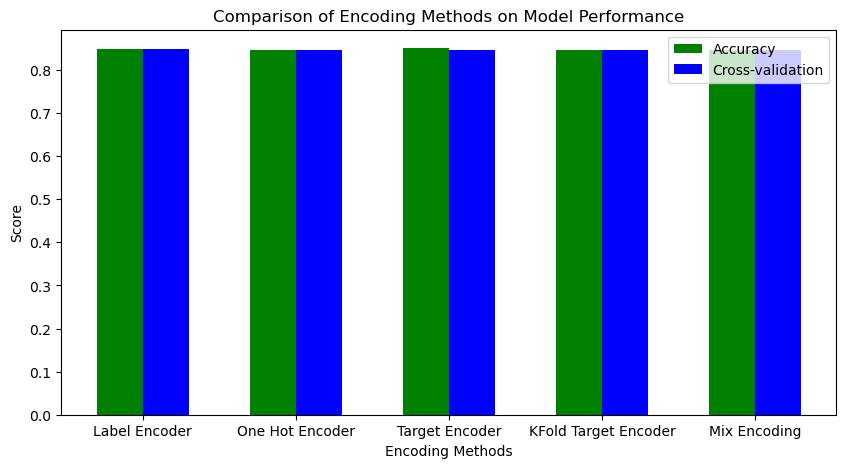

In [127]:
import matplotlib.pyplot as plt
import numpy as np

encoding_methods = ['Label Encoder', 'One Hot Encoder', 'Target Encoder', 'KFold Target Encoder', 'Mix Encoding']
accuracy_scores = [label_rf_accuracy, ohe_rf_accuracy, target_rf_accuracy, k_rf_accuracy, mix_rf_accuracy]
cv_scores = [label_rv_cv, ohe_rv_cv, target_rv_cv, k_rv_cv, mix_rv_cv]

x = np.arange(len(encoding_methods))
width = 0.3

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - width/2, accuracy_scores, width, label='Accuracy', color='green')
ax.bar(x + width/2, cv_scores, width, label='Cross-validation', color='blue')

ax.set_xlabel('Encoding Methods')
ax.set_ylabel('Score')
ax.set_title('Comparison of Encoding Methods on Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(encoding_methods, rotation=0)
ax.legend()

plt.show()